#### 9.6.2 (Pecora and Carroll’s approach) 
In the pioneering work of Pecora and Carroll (1990), one of the receiver variables is simply set equal to the corresponding transmitter variable.  
For instance, if $x(t)$ is used as the transmitter drive signal, then the receiver equations are

$x(t) = x(t)$  
$\dot{y_r} = [rx(t)] - [y_r] - [x(t)z_r]$  
$\dot{z_r} = [x(t)y_r] - [bz_r]$  

where the first equation is not a differential equation. Their numerical simulations and a heuristic argument suggested that  
$y_r(t) → y(t)$ and $z_r(t) → z(t)$ as $t → ∞$ even if there were differences in the initial conditions.  

In [2]:
using ChaosCrypto
using PyPlot
using Interact
using WAV

#### 9.6.3 (Computer experiments on synchronized chaos) 
Let $x, y, z$ be governed by the Lorenz equations with $r = 60, σ = 10, b = 8/3$.  
Let $x_r, y_r, z_r$ be governed by the system in Exercise 9.6.2.  
Choose different initial conditions for $y$ and $y_r$, and similarly for $z$ and $z_r$, and then start integrating numerically.  

a) Plot $y(t)$ and $y_r(t)$ on the same graph. With any luck, the two time series should eventually merge, even though both are chaotic.  
b) Plot the $(y,z)$ projection of both trajectories.

In [6]:
function lorenz11(xx,t)
    x, y, z, xr, yr, zr= xx
    # x,y,z gobernados por: ρ = 60, σ = 10, β = 8/3
    # xr,yr,zr gobernados por 9.6.2 (arriba)
    # Comenzamos a integrar numericamente
    AD.Taylor(x, [LO.σ])*(AD.Taylor(x,[y])-AD.Taylor(x,[x])),
    AD.Taylor(y,[x])*(AD.Taylor(y,[LO.ρ])-AD.Taylor(y,[z]))-AD.Taylor(y,[y]),
    AD.Taylor(z,[x])*AD.Taylor(z,[y])-AD.Taylor(z,[LO.β])*AD.Taylor(z,[z]),
    AD.Taylor(xr,[LO.σ])*(AD.Taylor(xr,[y])-AD.Taylor(xr,[xr])),
    AD.Taylor(yr,[LO.ρ])*AD.Taylor(yr,[xr])-AD.Taylor(yr,[yr])-AD.Taylor(yr,[xr])*AD.Taylor(yr,[zr]),
    AD.Taylor(zr,[xr])*AD.Taylor(zr,[yr])-AD.Taylor(zr,[LO.β])*AD.Taylor(zr,[zr])
end
# Escogiendo condiciones iniciales diferentes para y, yr; z, zr..
vecs,t = LO.integrador([1.,1.,1.,1.,100.,100.],lorenz11,10.);

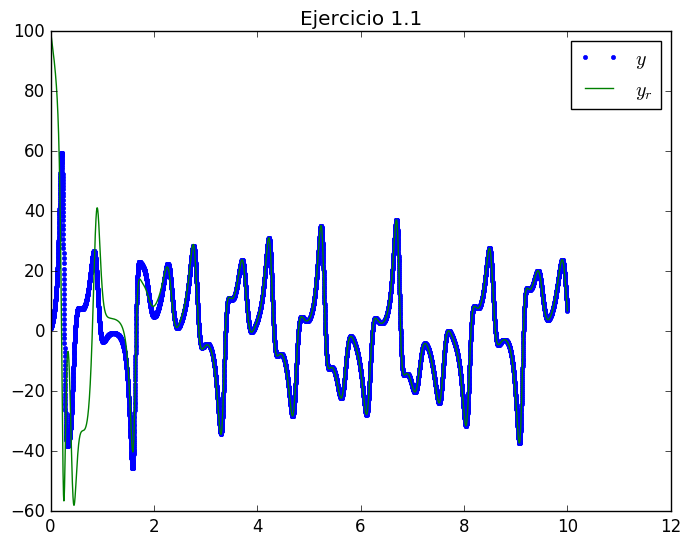

In [10]:
# Graficamos a y(t) y yr(t) en el mismo plot. Observamos que eventualmente las dos series de tiempo se mergen.
title("Ejercicio 1.1")
plot(t, [x[2] for x in vecs], ".", label=L"$y$")
plot(t, [x[5] for x in vecs], label=L"$y_r$")
legend()
show()

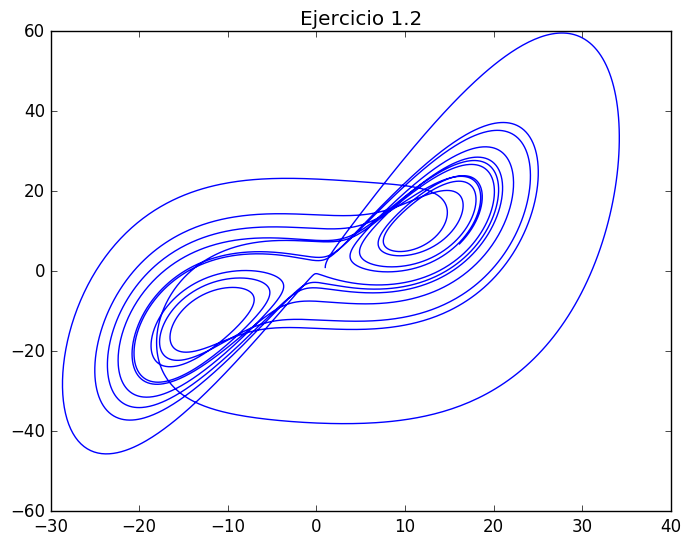

In [12]:
# Graficamos la proyeccion (y,z) de ambas trayectorias

# title("Ejercicio 1.2")
# plot3D([x[1] for x in vecs],[x[2] for x in vecs],[x[3] for x in vecs])
# legend()
# show()

title("Ejercicio 1.2")
plot([x[1] for x in vecs],[x[2] for x in vecs])
legend()
show()

#### 9.6.4 (Some drives don’t work) 
Suppose $z(t)$ were the drive signal in Exercise 9.6.2, instead of $x(t)$. In other words, we replace $z_r$ by $z(t)$ everywhere in the receiver equations, and watch how $x_r$ and $y_r$ evolve.

a) Show numerically that the receiver does not synchronize in this case.  
b) What if $y(t)$ were the drive?

#### 9.6.5 (Masking)
In their signal-masking approach, Cuomo and Oppenheim (1992, 1993) use the following receiver dynamics:

$\dot{x_r} = \sigma (y_r - x_r)$  
$\dot{y_r} = [rs(t)] - [y(r)] - [s(t)z_r]$   
$\dot{z_r} = [s(t)y_r] - [bz_r]$  

where  $s(t) = x(t) + m(t)$,  and $m(t)$ is the low-power message added to the much stronger chaotic mask $x(t)$. If the receiver has synchronized with the drive, then $x_r(t) ≈ x(t)$ and so $m(t)$ may be recovered as  $\hat{m}(t) = s(t) - x_r(t)$

Test this approach numerically, using a sine wave for $m(t)$. How close is the estimate  to the actual message $m(t)$? How does the error depend on the frequency of the sine wave?